In [1]:
import cv2  
import cv2 as cv 
import numpy as np 
from matplotlib import pyplot as plt 
from PIL import Image 
from numpy import asarray 
import matplotlib.image as mpimg
from scipy import ndimage
from skimage import filters, feature, measure, color
from skimage.segmentation import watershed
from google.colab.patches import cv2_imshow  

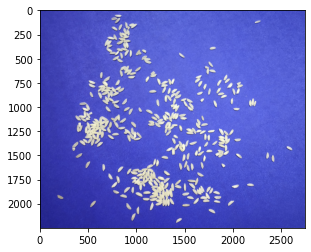

In [2]:
img_fullgrain1 = cv2.imread("full_grain_1.jpg")
img1=cv2.cvtColor(img_fullgrain1,cv2.COLOR_BGR2RGB)

plt.imshow(img1)

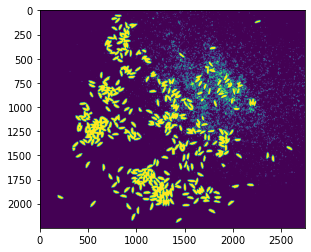

In [3]:
img1_gray=cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
ret, thresh_img = cv2.threshold(img1_gray, 120, 255, cv2.THRESH_BINARY)
plt.imshow(thresh_img)

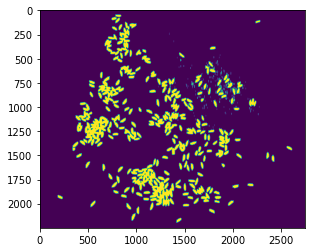

In [4]:
kernel = np.ones((3),np.uint8)
clear_image = cv2.morphologyEx(thresh_img,cv2.MORPH_OPEN, kernel, iterations=8)
plt.imshow(clear_image)  

In [5]:
#Copying the preprocessed image as label_image
label_image = clear_image.copy()

#Creating a label_count variable to the count the number of grains in the image
label_count = 0

#Shape function for getting height and width
rows, cols = label_image.shape

#Looping through the pixel of image using rows and column of image
for j in range(rows):
    for i in range(cols):
        pixel = label_image[j, i]

        #Here there is single channel with 2 pixel intensities, Either 0 or 255. 0 represent black portion, where 255 represent grains (White).
        #Counting the total number of pixel with intensity 255
        if 255 == pixel:
            label_count += 1

            ##Applying floodFill method of opencv which will help in filling the backgroud that will ultimately helps in couting the contoured grain easily
            cv.floodFill(label_image, None, (i, j), label_count)

Number of foreground objects 268297


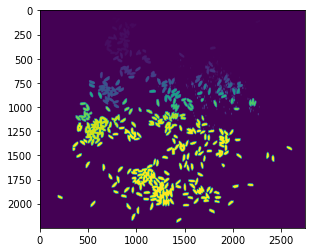

In [6]:
print("Number of foreground objects", label_count)
plt.imshow(label_image)
     

In [7]:
contours, hierarchy = cv.findContours(clear_image, 
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


output_contour = cv.cvtColor(clear_image, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))

Number of detected contours 400


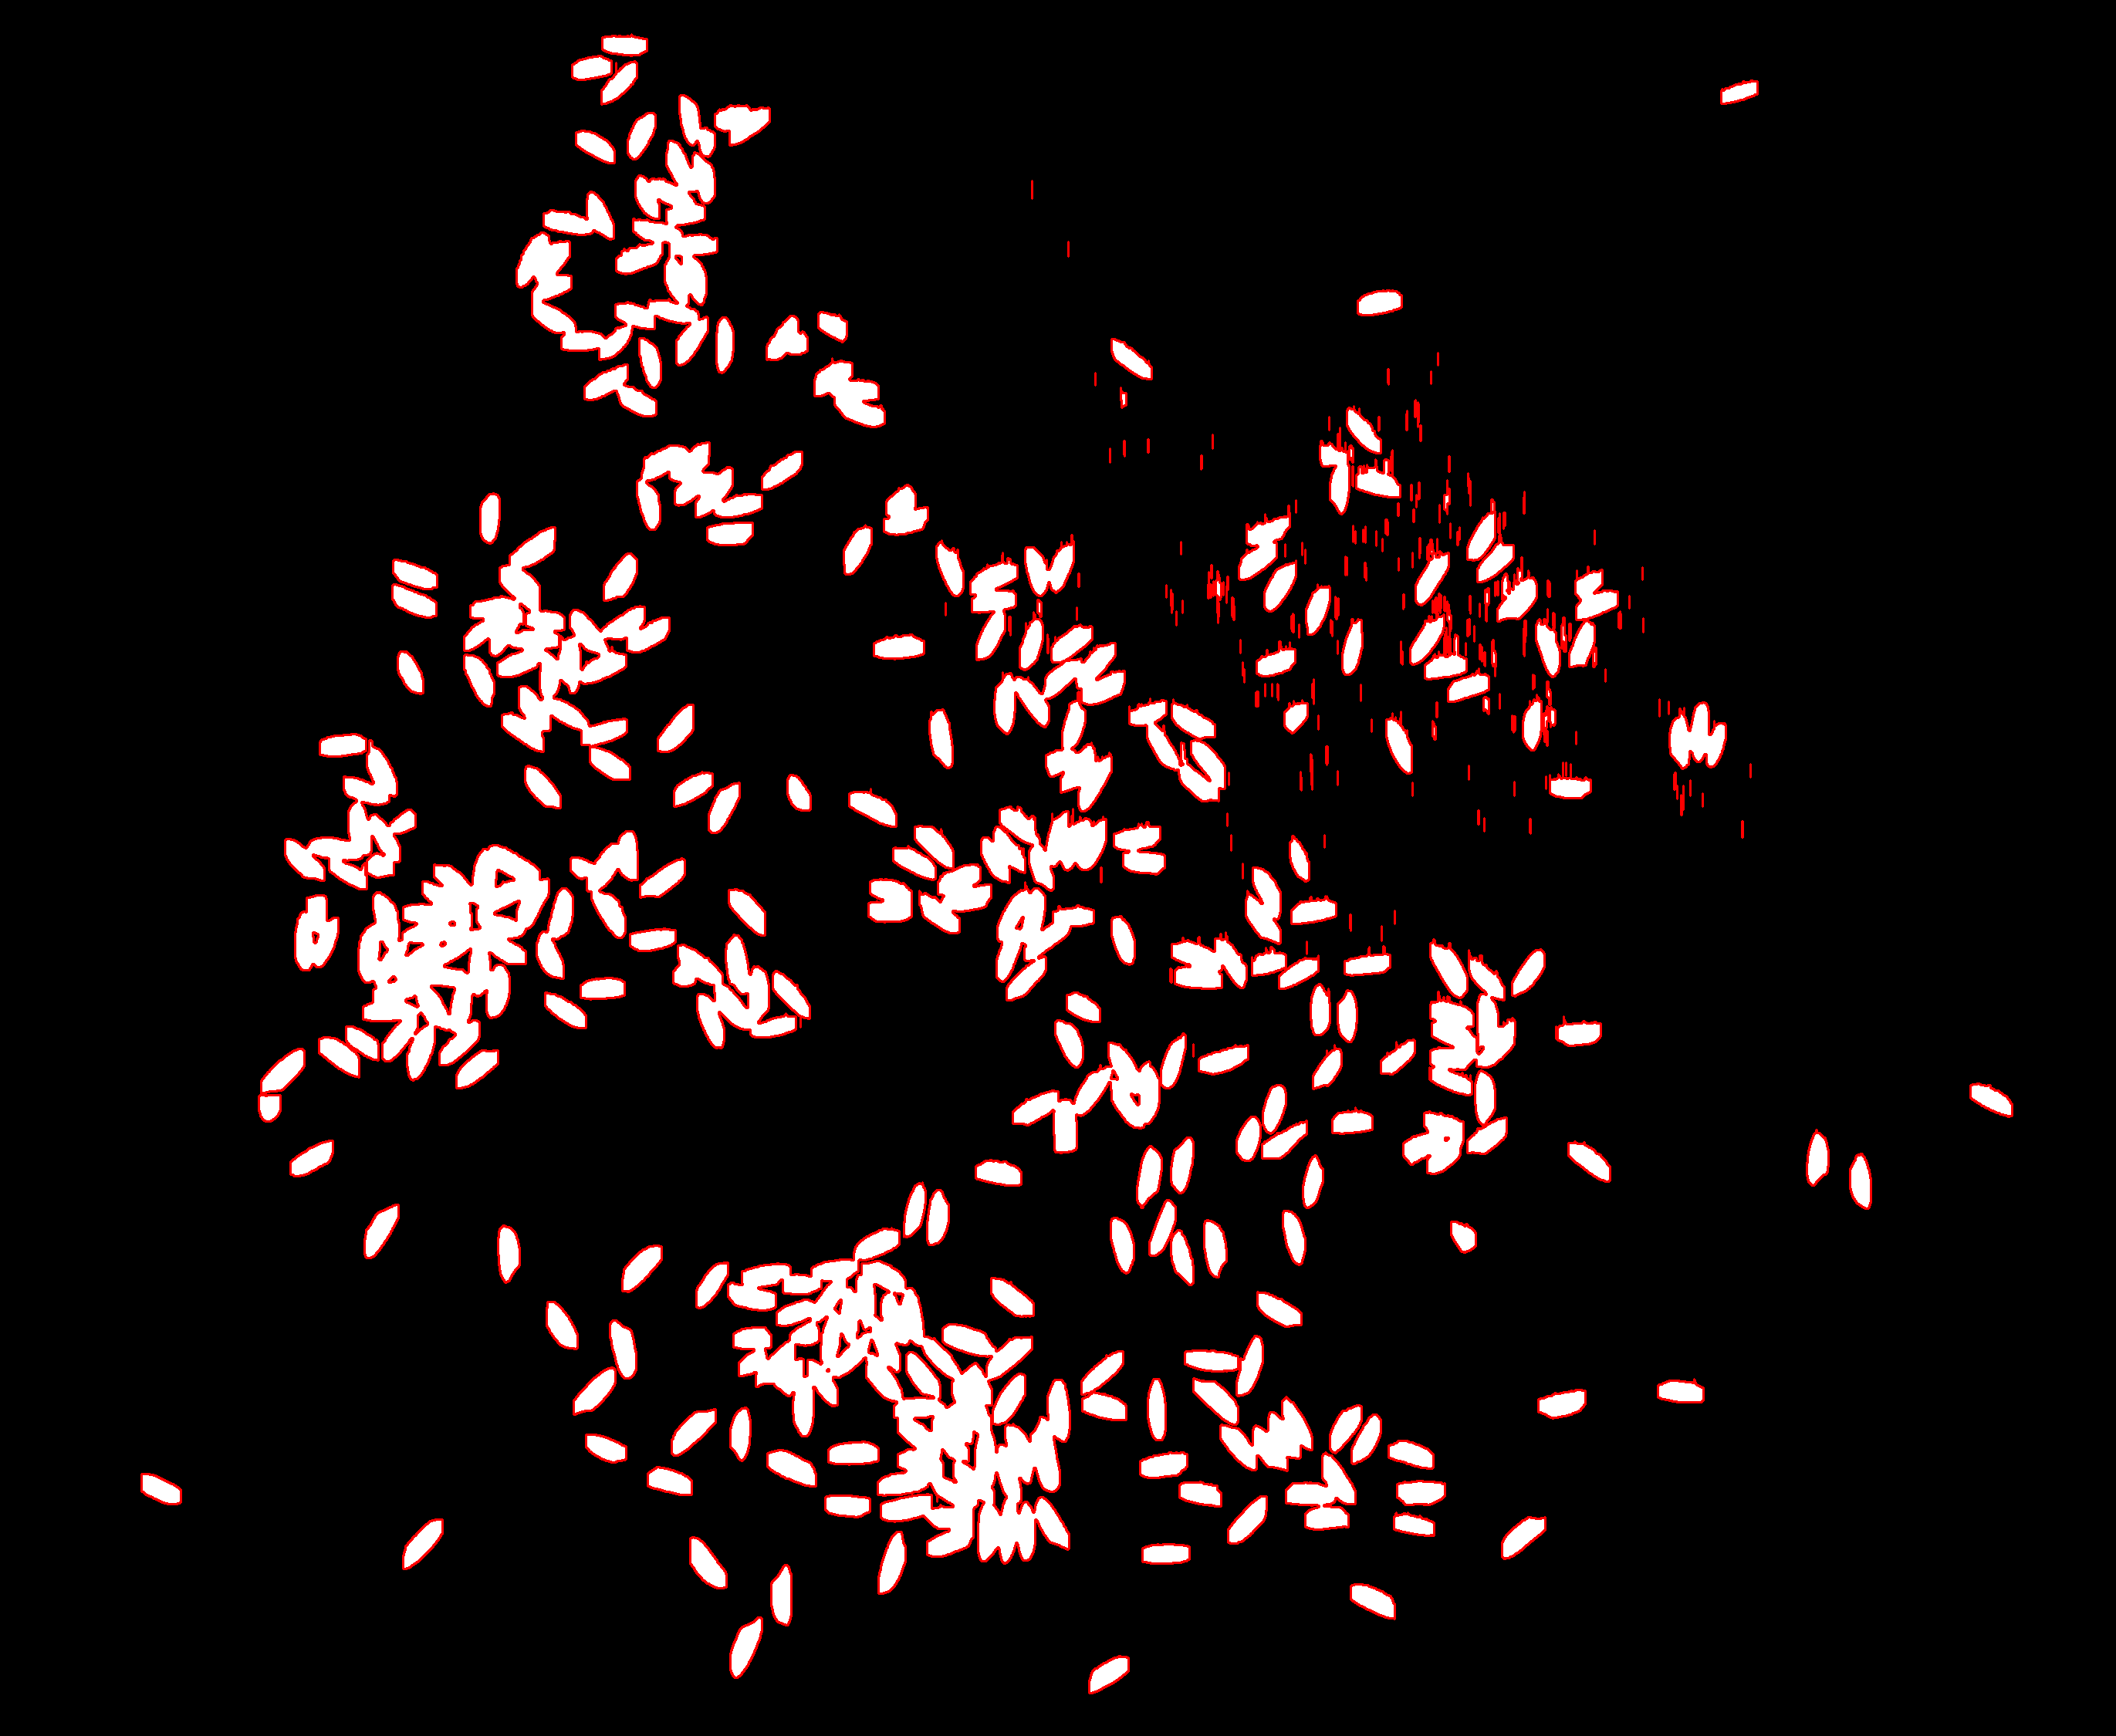

 
 Number of detected contours 400


In [8]:
cv2_imshow(output_contour)

print(" \n Number of detected contours", len(contours))
     

In [9]:
dist_trans = ndimage.distance_transform_edt(clear_image)


local_max = feature.peak_local_max(dist_trans, min_distance=23)


local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True


labels = watershed(-dist_trans, measure.label(local_max_mask), mask=clear_image)

Number of Rice grains are : 359


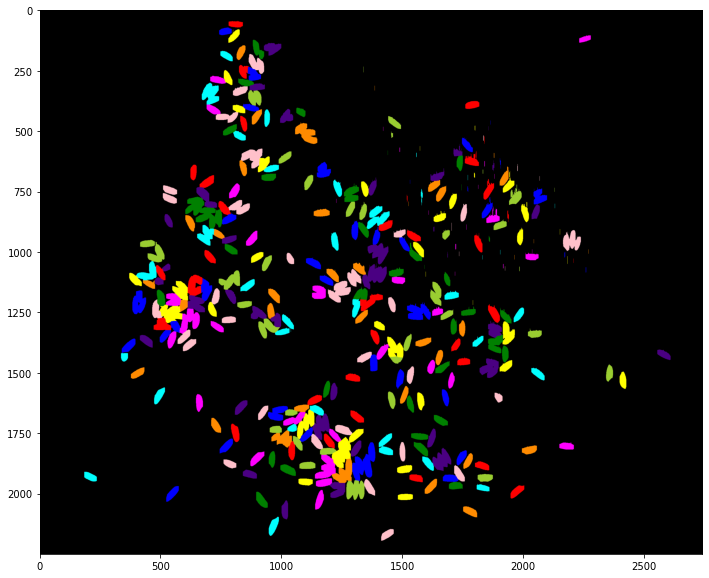

In [10]:
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels, bg_label=0))
print("Number of Rice grains are : %d" % labels.max())

In [11]:
broken_count = []
full_count=[]
#Iterating through contour and filtering out the rice grains with area less than 800 and then appending to the count variable.
for x in contours:

  #Using contourArea method to get the area of rice (Contour)
  area = cv.contourArea(x)
  if area > 800 :
    broken_count.append(x)
  else:
    full_count.append(x)
#Output of the count list.

print("Total number of broken rice present in the Image is: ",len(broken_count))
print("Total number of full grain rice present in the Image is: ",len(full_count))

Total number of broken rice present in the Image is:  186
Total number of full grain rice present in the Image is:  214


another method

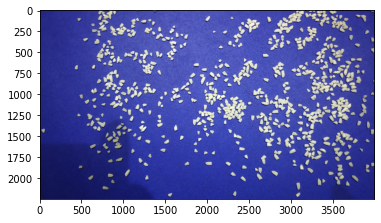

In [12]:
img_brokengrain1 = cv2.imread("/content/broken_grain_1.jpg")
img1=cv2.cvtColor(img_brokengrain1,cv2.COLOR_BGR2RGB)

plt.imshow(img1)

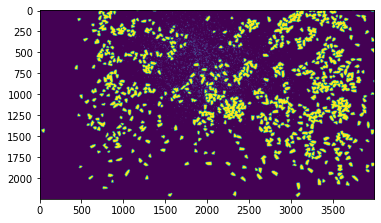

In [13]:
img1_gray=cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
ret, thresh_img = cv2.threshold(img1_gray, 120, 255, cv2.THRESH_BINARY)
plt.imshow(thresh_img)

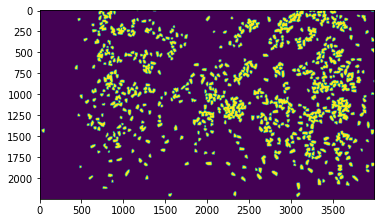

In [14]:
kernel = np.ones((3),np.uint8)
clear_image = cv2.morphologyEx(thresh_img,cv2.MORPH_OPEN, kernel, iterations=8)
plt.imshow(clear_image)  

In [15]:

label_image = clear_image.copy()

label_count = 0


rows, cols = label_image.shape

for j in range(rows):
    for i in range(cols):
        pixel = label_image[j, i]

        
        if 255 == pixel:
            label_count += 1

            
            cv.floodFill(label_image, None, (i, j), label_count)

Number of foreground objects 541292


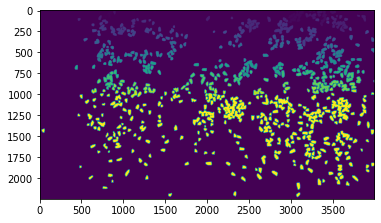

In [16]:
print("Number of foreground objects", label_count)
plt.imshow(label_image)

In [17]:
contours, hierarchy = cv.findContours(clear_image, 
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


output_contour = cv.cvtColor(clear_image, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))

Number of detected contours 511


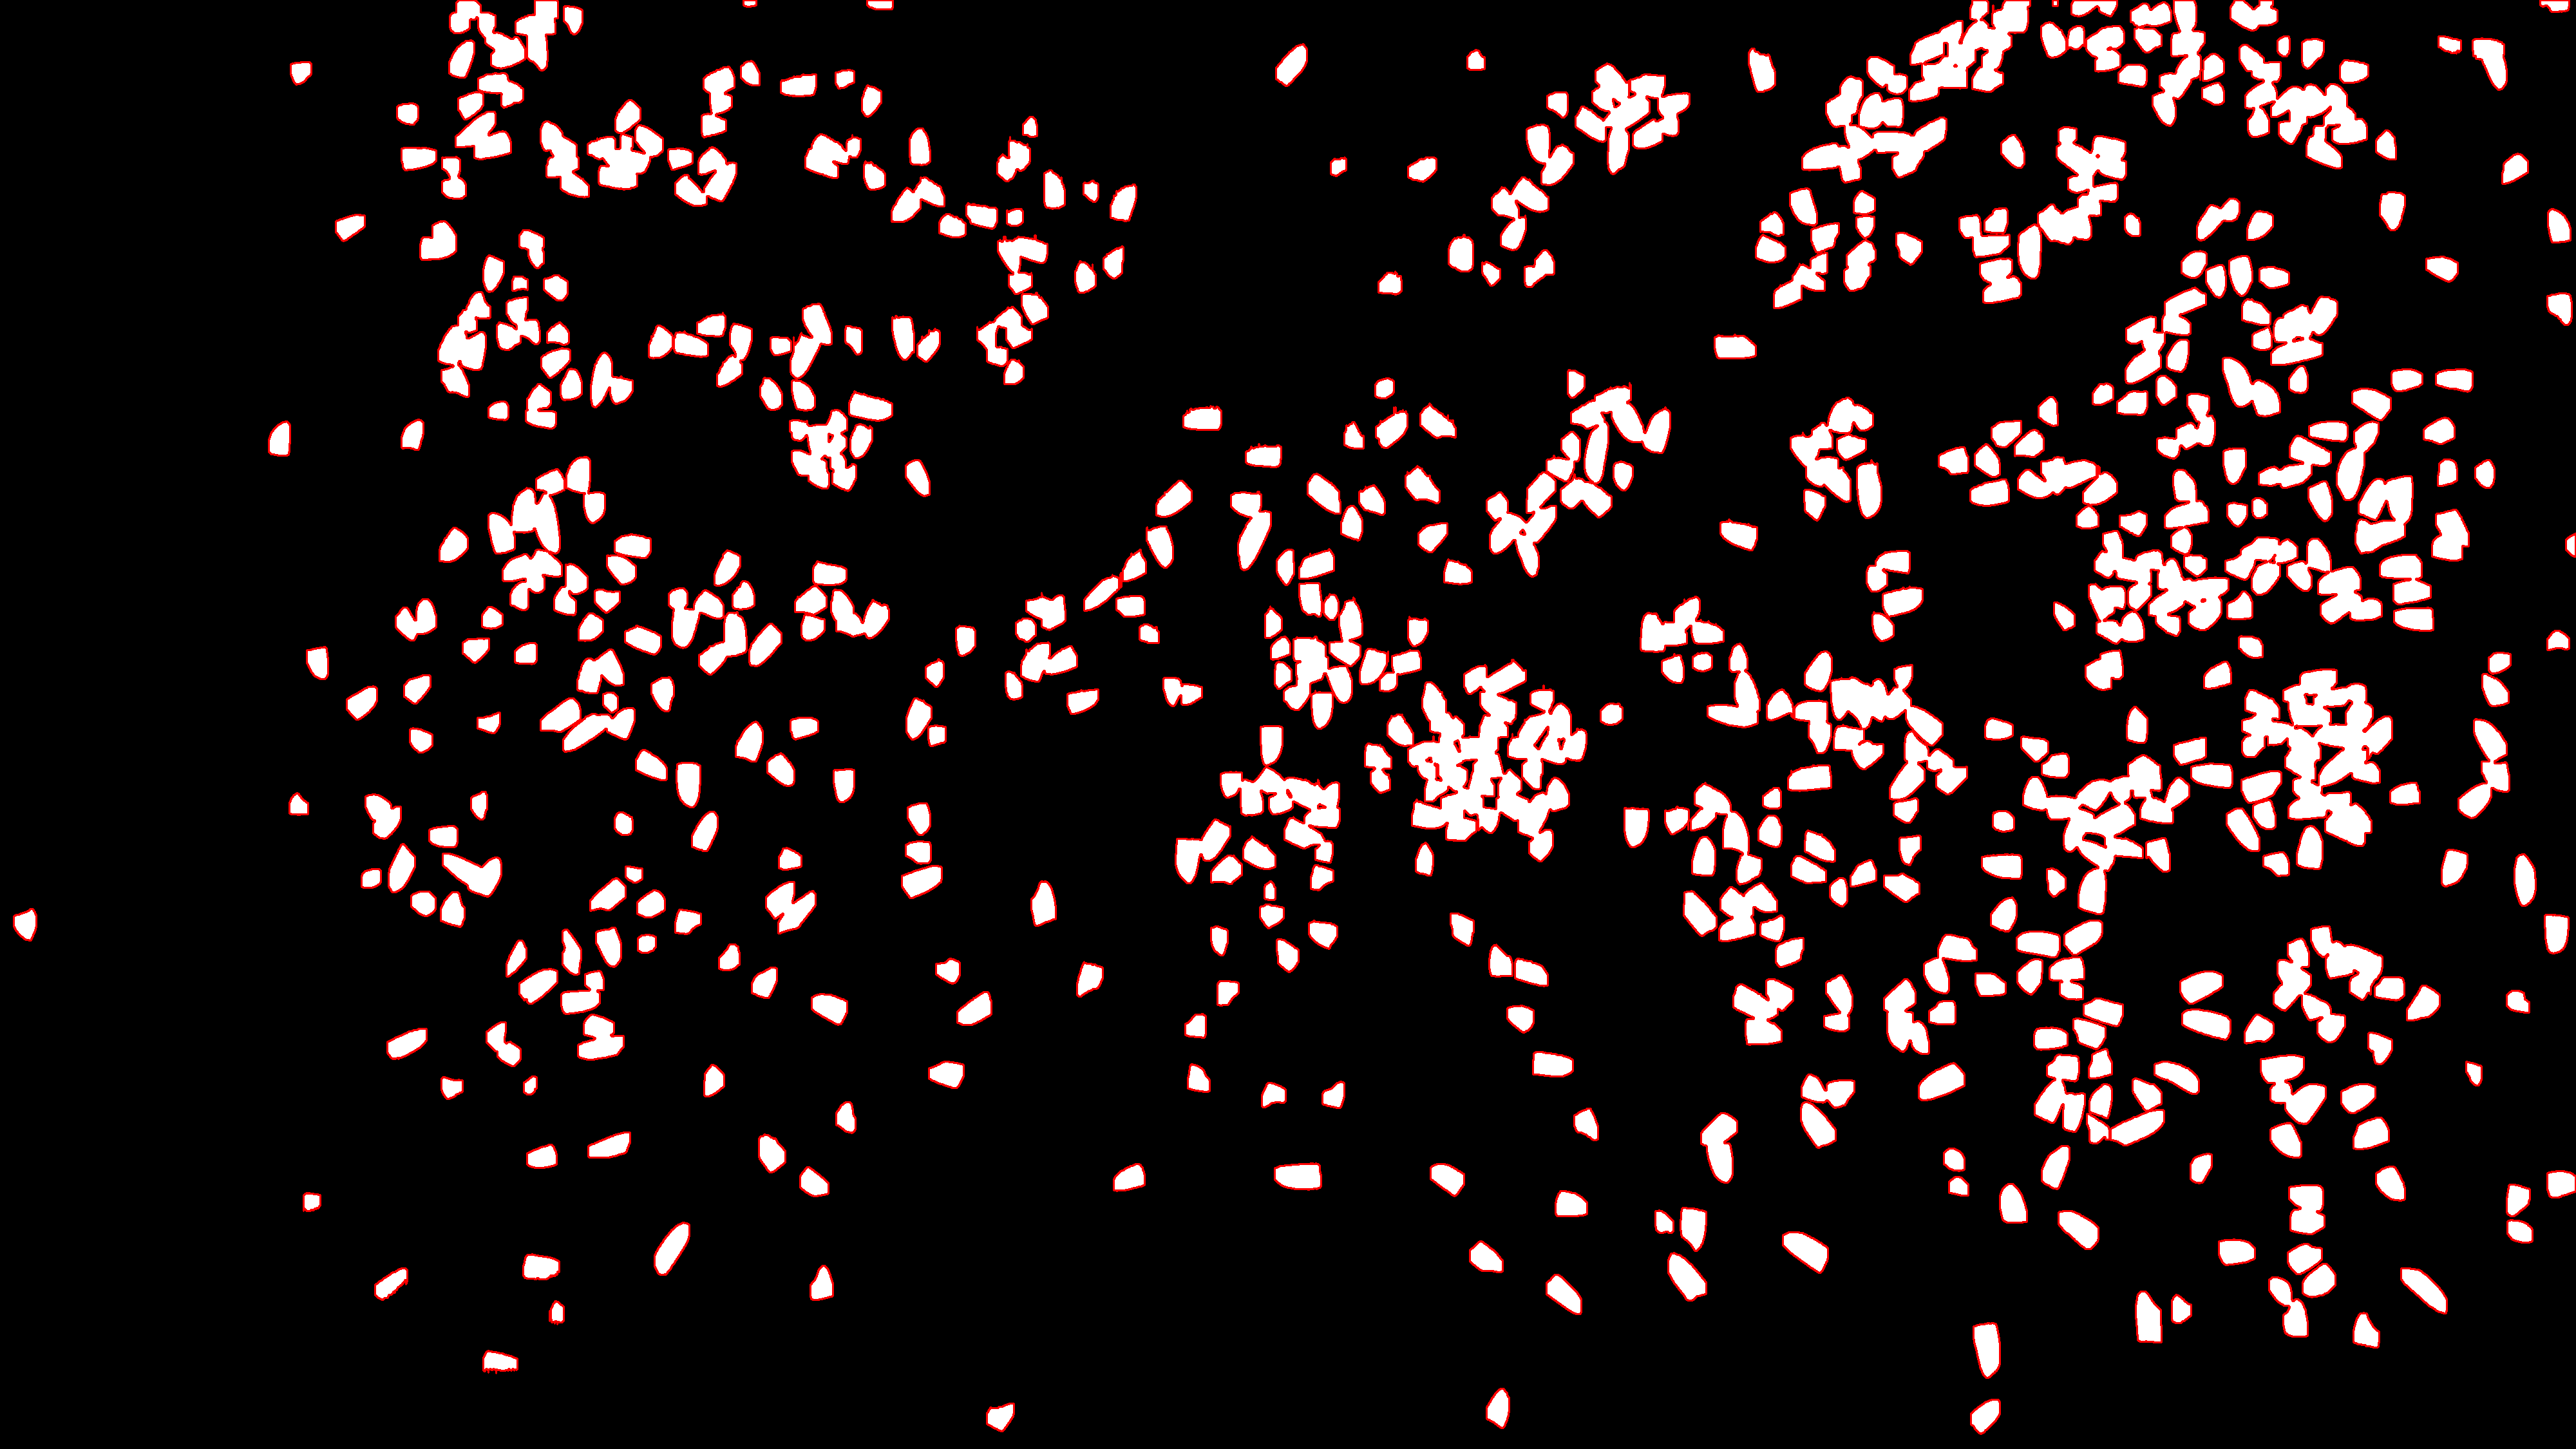

 
 Number of detected contours 511


In [18]:
cv2_imshow(output_contour)

print(" \n Number of detected contours", len(contours))

In [19]:
dist_trans = ndimage.distance_transform_edt(clear_image)


local_max = feature.peak_local_max(dist_trans, min_distance=23)


local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True


labels = watershed(-dist_trans, measure.label(local_max_mask), mask=clear_image)

Number of Rice grains are : 710


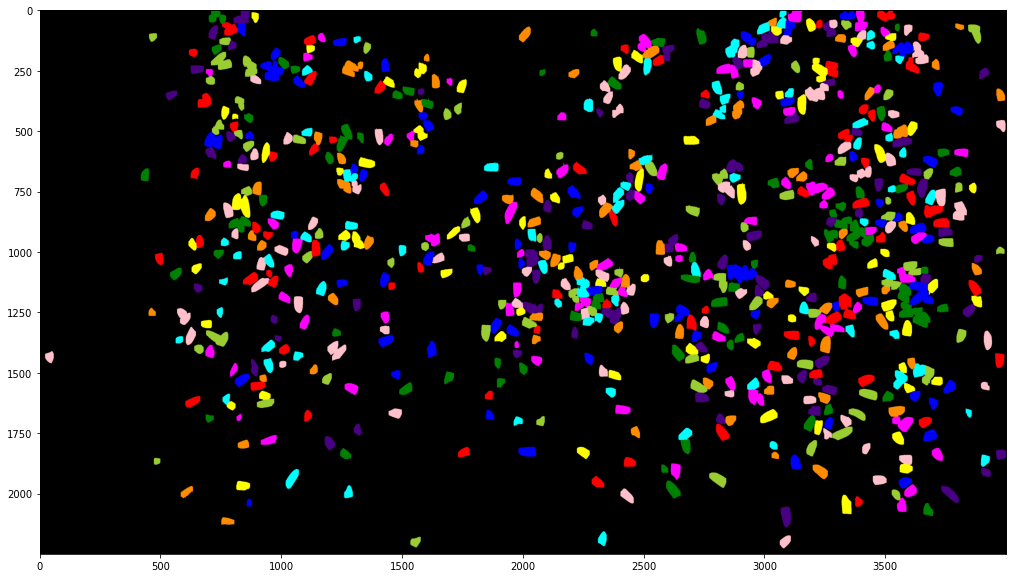

In [20]:
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels, bg_label=0))
print("Number of Rice grains are : %d" % labels.max())

In [21]:
broken_count = []
full_count=[]

for x in contours:

  area = cv.contourArea(x)
  if area > 800 :
    broken_count.append(x)
  else:
    full_count.append(x)

print("Total number of broken rice present in the Image is: ",len(broken_count))
print("Total number of full grain rice present in the Image is: ",len(full_count))

Total number of broken rice present in the Image is:  439
Total number of full grain rice present in the Image is:  72


Number of foreground objects 541292
Number of detected contours 511


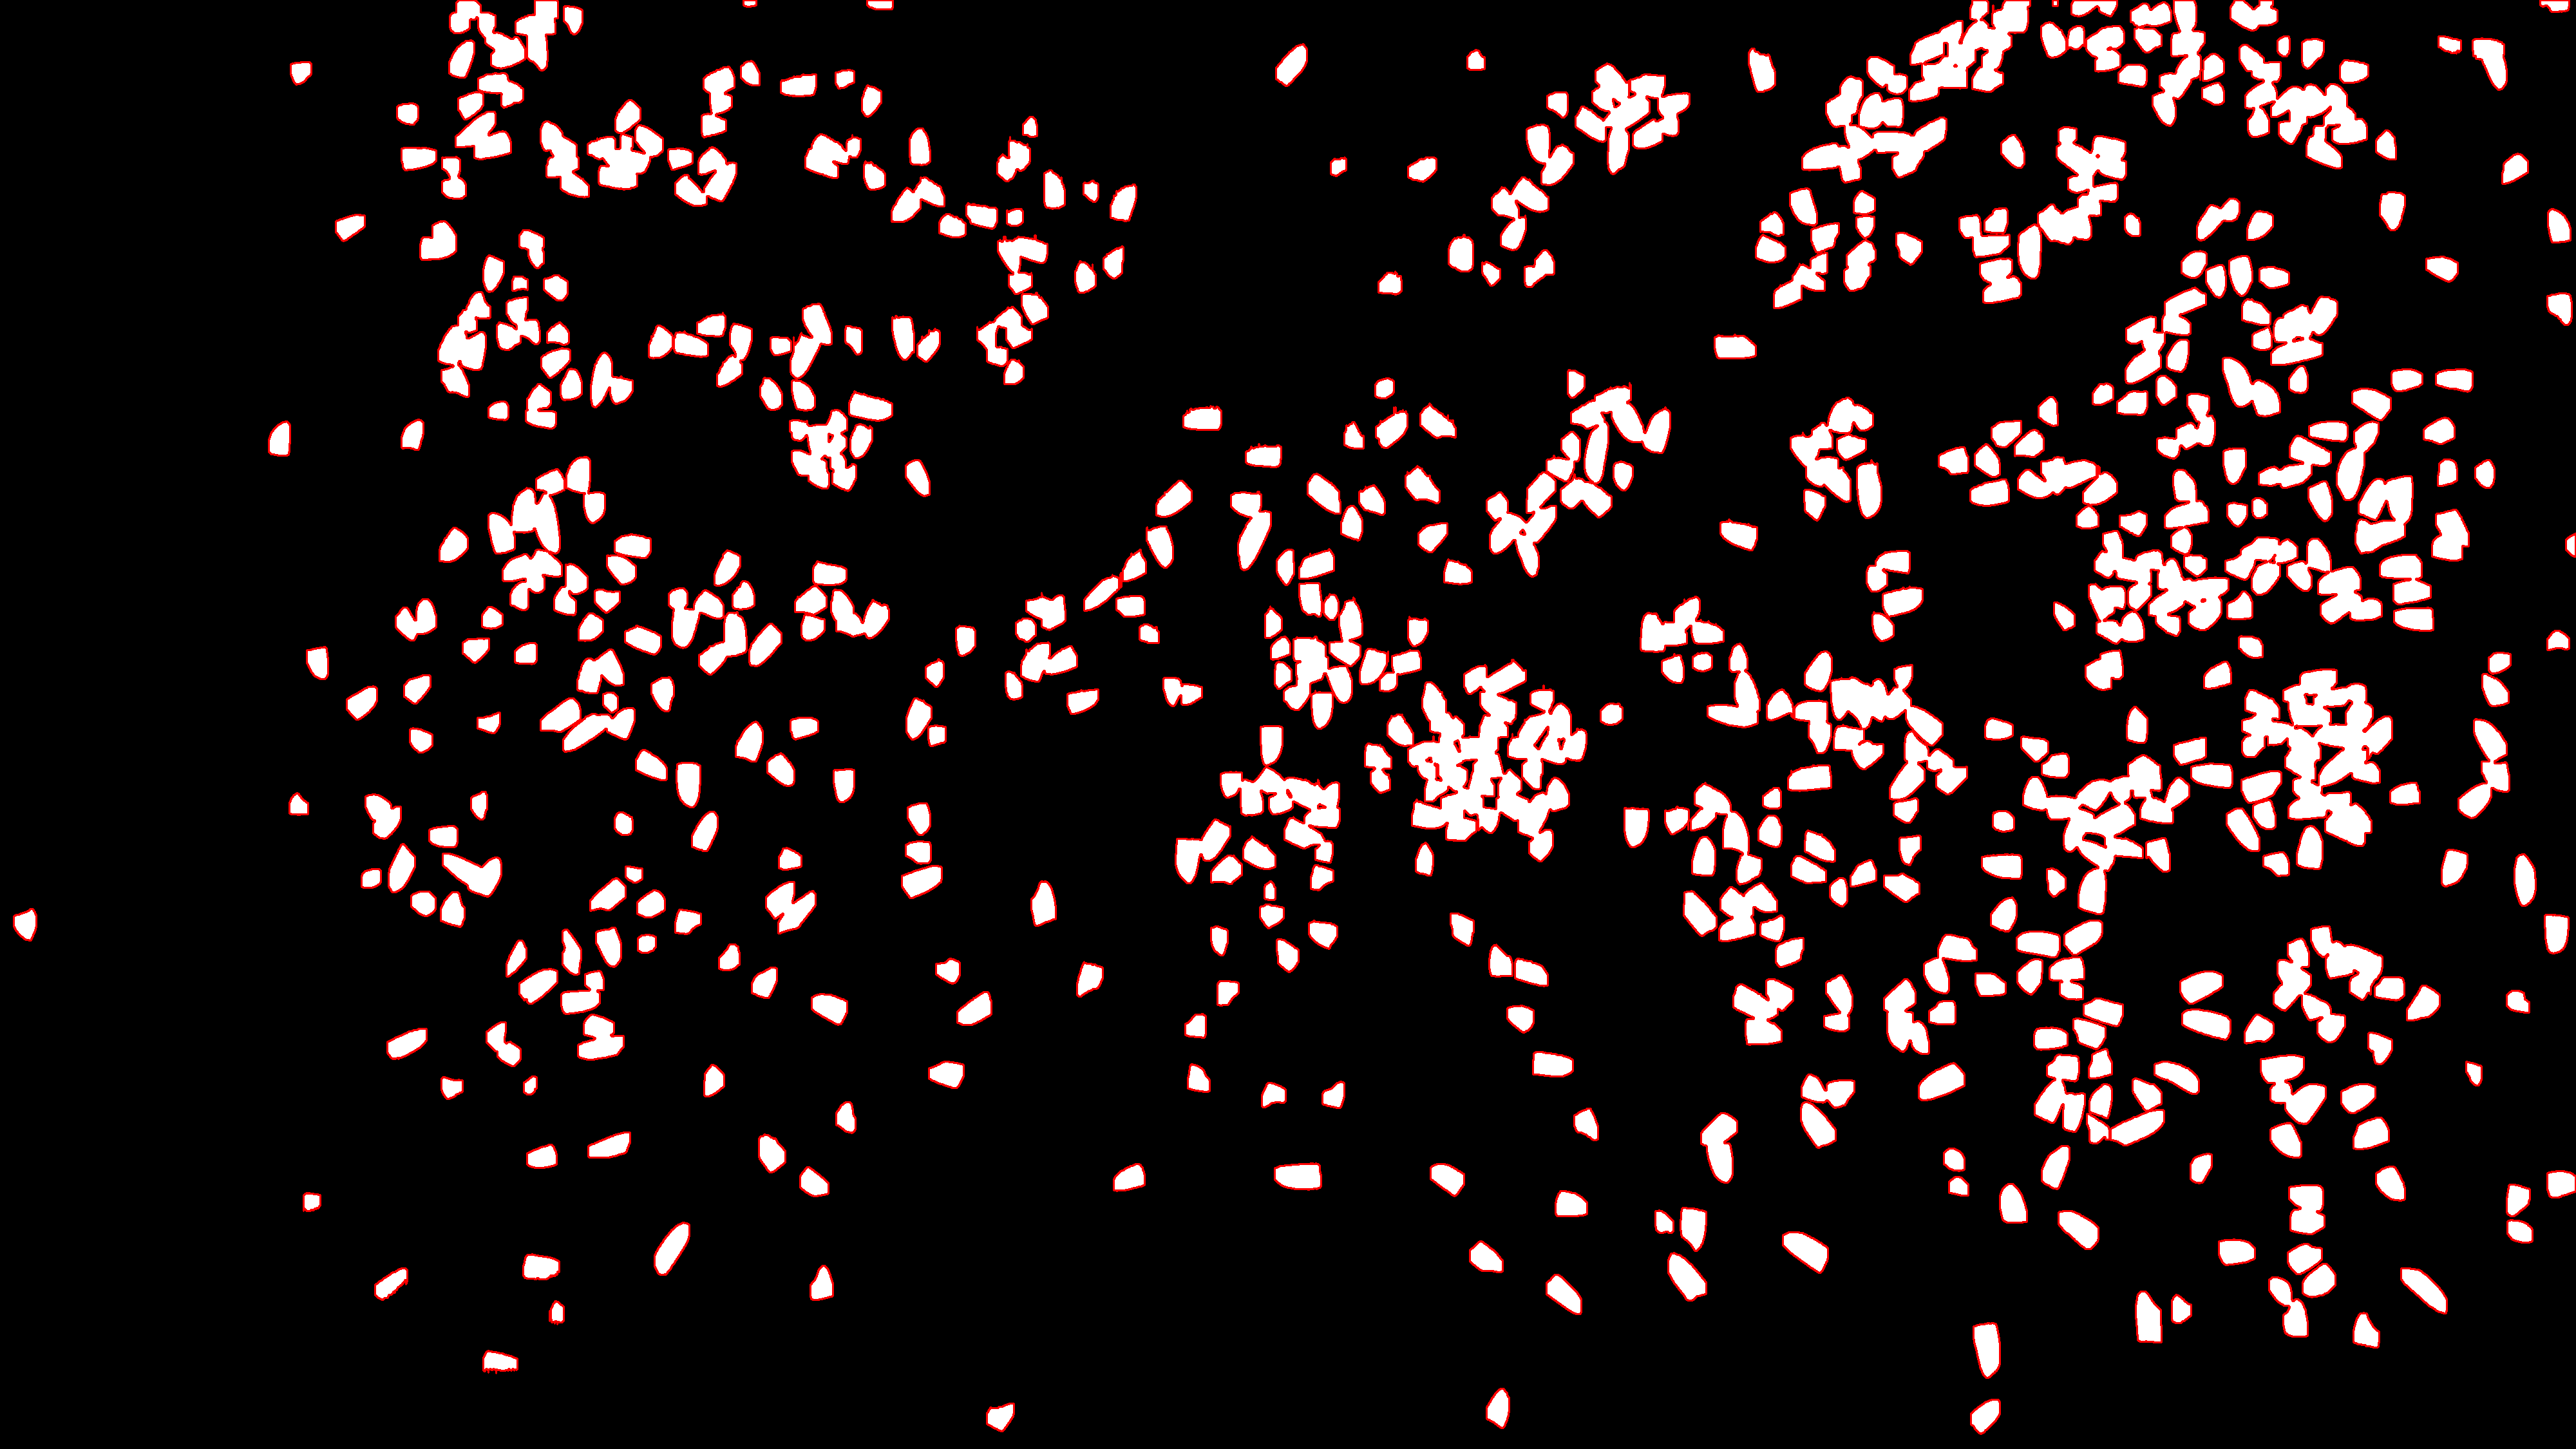

 
 Number of detected contours 511
Number of Rice grains are : 710
Total number of broken rice present in the Image is:  439
Total number of full grain rice present in the Image is:  72


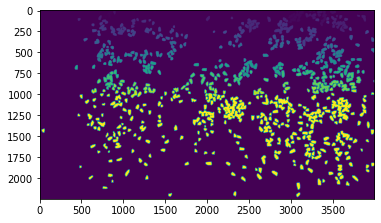

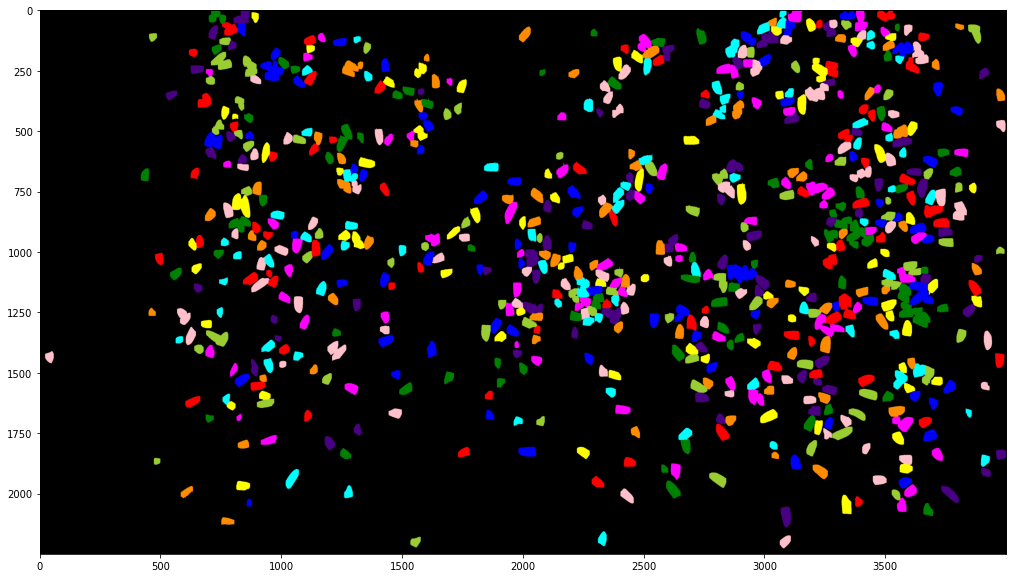

In [23]:
img_mixedgrain1 = cv2.imread("/content/mixed_grain_1.jpg")
img1=cv2.cvtColor(img_brokengrain1,cv2.COLOR_BGR2RGB)

img1_gray=cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
ret, thresh_img = cv2.threshold(img1_gray, 120, 255, cv2.THRESH_BINARY)

kernel = np.ones((3),np.uint8)
clear_image = cv2.morphologyEx(thresh_img,cv2.MORPH_OPEN, kernel, iterations=8)

label_image = clear_image.copy()

label_count = 0
rows, cols = label_image.shape

for j in range(rows):
    for i in range(cols):
        pixel = label_image[j, i]

        
        if 255 == pixel:
            label_count += 1

            
            cv.floodFill(label_image, None, (i, j), label_count)

contours, hierarchy = cv.findContours(clear_image, 
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


output_contour = cv.cvtColor(clear_image, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)


cv2_imshow(output_contour)



dist_trans = ndimage.distance_transform_edt(clear_image)


local_max = feature.peak_local_max(dist_trans, min_distance=23)


local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True


labels = watershed(-dist_trans, measure.label(local_max_mask), mask=clear_image)

plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels, bg_label=0))


broken_count = []
full_count=[]

for x in contours:

  area = cv.contourArea(x)
  if area > 800 :
    broken_count.append(x)
  else:
    full_count.append(x)

print("Total number of broken rice present in the Image is: ",len(broken_count))
print("Total number of full grain rice present in the Image is: ",len(full_count))


In [74]:
def rice_detection(image):
  img = cv2.imread(image)
  img1=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

  img1_gray=cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
  ret, thresh_img = cv2.threshold(img1_gray, 120, 255, cv2.THRESH_BINARY)

  kernel = np.ones((3),np.uint8)
  clear_image = cv2.morphologyEx(thresh_img,cv2.MORPH_OPEN, kernel, iterations=8)

  label_image = clear_image.copy()

  label_count = 0
  rows, cols = label_image.shape

  for j in range(rows):
    for i in range(cols):
      pixel = label_image[j, i]
      if 255 == pixel:
        label_count += 1

            
  cv.floodFill(label_image, None, (i, j), label_count)

  contours, hierarchy = cv.findContours(clear_image,cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


  output_contour = cv.cvtColor(clear_image, cv.COLOR_GRAY2BGR)
  cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)

  dist_trans = ndimage.distance_transform_edt(clear_image)


  local_max = feature.peak_local_max(dist_trans, min_distance=23)


  local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
  local_max_mask[tuple(local_max.T)] = True


  labels = watershed(-dist_trans, measure.label(local_max_mask), mask=clear_image)

  broken_count = []
  full_count=[]

  for x in contours:
    area = cv.contourArea(x)
    if area > 800 :
      broken_count.append(x)
    else:
      full_count.append(x)
  
  total_rice=labels.max()
  broken_rice=len(broken_count)
  return(total_rice,broken_rice)


In [75]:
import pandas as pd 

In [77]:
image_files=['image_1.jpg','image_2.jpg','image_3.jpg','image_4.jpg','image_5.jpg']

total_rice_grains=[]
total_broken_rice_grains=[]

for f in image_files:
  x,y=rice_detection(f)
  total_rice_grains.append(x)
  total_broken_rice_grains.append(y)



In [92]:
submission_file=pd.DataFrame(columns=['file_name','total_rice_grain','total_broken_rice_grain'])
submission_file['file_name']=image_files
submission_file['total_rice_grain']=total_rice_grains
submission_file['total_broken_rice_grain']=total_broken_rice_grains

In [93]:
submission_file

,file_name,total_rice_grain,total_broken_rice_grain
0,image_1.jpg,586,426
1,image_2.jpg,602,382
2,image_3.jpg,618,415
3,image_4.jpg,695,442
4,image_5.jpg,704,434


In [94]:
submission_file.to_csv('submission_file')